In [1]:
from dpks.quant_matrix import QuantMatrix
from sklearn.cluster import KMeans, AgglomerativeClustering, FeatureAgglomeration, HDBSCAN

import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.datasets import make_classification

In [20]:

# Parameters for the dataset
n_samples = 1000
n_features = 6000
n_informative = 300
n_redundant = 2700
n_noise = n_features - n_informative - n_redundant

# Create a dataset with informative, redundant, and noise features
X, y = make_classification(
    n_samples=n_samples,
    n_features=n_features,
    n_informative=n_informative,
    n_redundant=n_redundant,
    n_repeated=0,
    n_classes=2,
    random_state=42,
    n_clusters_per_class=3
)


In [21]:

X = pd.DataFrame(X, columns=[f'Protein_{i+1}' for i in range(n_features)])

X

Protein_1  Protein_2   Protein_3  Protein_4   Protein_5  Protein_6  \
0    -40.978735   0.434349    8.731190  -0.698420   29.057587   0.044837   
1     67.960399   0.232883 -171.380230  -0.006765  -16.863445   0.471172   
2     42.056738  -1.314746 -242.367499   0.670926 -137.092228   0.667689   
3   -111.640769   1.411158 -140.598729  -0.839208   -6.786153   1.121050   
4   -115.805539   0.701374  -78.465105   0.940856  -21.015713   1.638756   
..          ...        ...         ...        ...         ...        ...   
995  166.204587  -0.623739   26.445498  -1.357622   16.039628   1.940082   
996   15.892179  -0.031055   36.738614  -0.492405  -32.445991  -0.041494   
997   74.559955  -1.641360   54.262533  -0.255432    1.389708   0.377470   
998  -78.470091  -0.629565  -74.500469   0.187471   41.206918   0.156729   
999  -74.010092   2.051087   30.639121   1.667647  106.683176   0.219365   

      Protein_7  Protein_8   Protein_9  Protein_10  ...  Protein_5991  \
0    -49.136534   0.426518   -2.516701   -1.308252  ...     -0.885547   
1    -46.815648  -0.118510   32.143378   -0.092091  ...      0.167702   
2    -35.974100   1.640436   83.327212   -0.918340  ...      0.400596   
3   -147.199069   0.147805   83.914874    0.701699  ...     -1.713575   
4    -48.381112  -0.983149   40.709566   -0.087291  ...     -1.660311   
..          ...        ...         ...         ...  ...           ...   
995   -8.382237   0.187231 -223.762260    0.285090  ...     -0.000428   
996   34.008461  -0.879612   99.879609   -0.762849  ...      1.747669   
997   51.338976  -1.061161  121.328328    0.444135  ...      0.058549   
998  107.200961  -0.626634  106.523134   -1.456112  ...     -0.345157   
999  -20.129480   1.335583  116.775573    1.119652  ...     -1.235289   

     Protein_5992  Protein_5993  Protein_5994  Protein_5995  Protein_5996  \
0       12.990150     -0.147784     -0.056306     -0.183955      0.374822   
1      155.106903      0.215155      0.593450      0.971550     -0.900698   
2     -180.772634      1.350262     -1.347058      0.317707      1.111793   
3      131.312816      1.504982     -0.141610      1.158958      0.430742   
4        6.692620     -0.199012     -0.613403     -0.352677      0.358266   
..            ...           ...           ...           ...           ...   
995   -164.226560      0.747514      0.777479     -1.314043      0.492434   
996    -21.375979      0.737091      1.652521     -1.343399     -2.527327   
997    126.913758      0.588569     -0.552909     -0.538637      1.346238   
998   -176.759163      0.150535     -0.690072     -0.572426      1.361378   
999    -79.813397     -1.756699     -0.190741     -1.219713     -1.020458   

     Protein_5997  Protein_5998  Protein_5999  Protein_6000  
0       10.753189     -7.985712    125.272663     23.921593  
1       30.200091   -108.206719     99.825625    155.796040  
2     -105.764725      8.109509   -119.654521     87.909447  
3      -14.298659   -117.865011    -25.165641    -78.494474  
4       64.478637      3.881202     64.991667     54.232333  
..            ...           ...           ...           ...  
995    -61.213672   -234.837540    188.909529     54.061442  
996    129.481357    -33.688357     89.375399     36.840533  
997     72.303497     64.831770    -18.174607    -37.592478  
998     72.750647     24.616011     59.015138    -41.884568  
999    -29.539339     92.918374    141.442749     52.073674  

[1000 rows x 6000 columns]

In [22]:
from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()
#
# X[:] = scaler.fit_transform(X[:])

In [23]:
from sklearn.decomposition import PCA

from umap import UMAP

pca = UMAP(n_components=2, n_neighbors=5)

pca.fit(X)

components = pca.transform(X)

In [24]:
components = np.concatenate((y.reshape((-1, 1)), components), axis=1)

<Axes: xlabel='PC1', ylabel='PC2'>

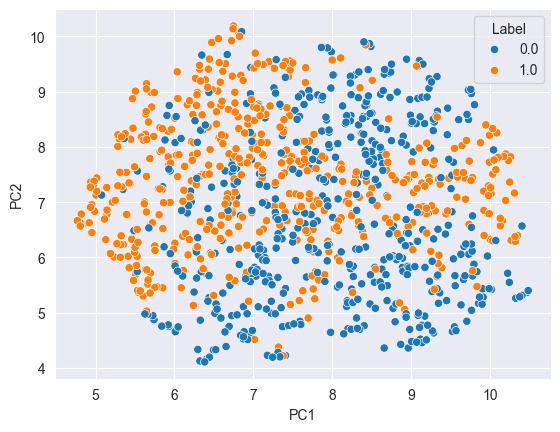

In [25]:
components = pd.DataFrame(components, columns=['Label', 'PC1', 'PC2'])

sns.scatterplot(
    data=components,
    x='PC1',
    y='PC2',
    hue='Label',
)

In [26]:
from sklearn.ensemble import HistGradientBoostingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression, Lasso, SGDClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
#import xgboost

# clf = xgboost.XGBClassifier(
#     #max_depth=10,
#     n_jobs=1,
#     #subsample=0.5,
#     #reg_lambda=2,
#     # objective="binary:logitraw",
#     # seed=42,
#     # eval_metric="logloss",
# )
# clf = HistGradientBoostingClassifier()
clf = LogisticRegression(
    n_jobs=1,
    max_iter=1000,
)
#clf = SVC(kernel="linear")
#clf = RandomForestClassifier()
#clf = Lasso()
#clf = AdaBoostClassifier()
#clf = SGDClassifier()

clf.fit(X[:], y)

LogisticRegression(max_iter=1000, n_jobs=1)

In [27]:
from sklearn.model_selection import cross_val_score

cross_val_score(clf, X, y, scoring='roc_auc', cv=5, n_jobs=1)

array([0.7439, 0.752 , 0.7826, 0.6685, 0.7177])

In [28]:
from sklearn.inspection import permutation_importance


importances = permutation_importance(
    clf,
    X,
    y,
    scoring="neg_log_loss",
    n_jobs=1,
    #max_samples=0.5,
    n_repeats=3,
)

In [29]:
importances['importances_mean'].shape

(6000,)

In [30]:
feature_importances = pd.DataFrame(
    {
        "feature": X.columns,
        "importance": importances['importances_mean']
    }
)

In [31]:
feature_importances.sort_values("importance", ascending=False)

feature  importance
4035  Protein_4036    0.000402
4987  Protein_4988    0.000289
5296  Protein_5297    0.000260
1750  Protein_1751    0.000248
3202  Protein_3203    0.000247
...            ...         ...
4043  Protein_4044   -0.000001
607    Protein_608   -0.000001
2289  Protein_2290   -0.000001
1541  Protein_1542   -0.000002
5610  Protein_5611   -0.000003

[6000 rows x 2 columns]

In [32]:
feature_importances['feature'] = feature_importances['feature'].astype(str)

<Axes: xlabel='importance', ylabel='feature'>

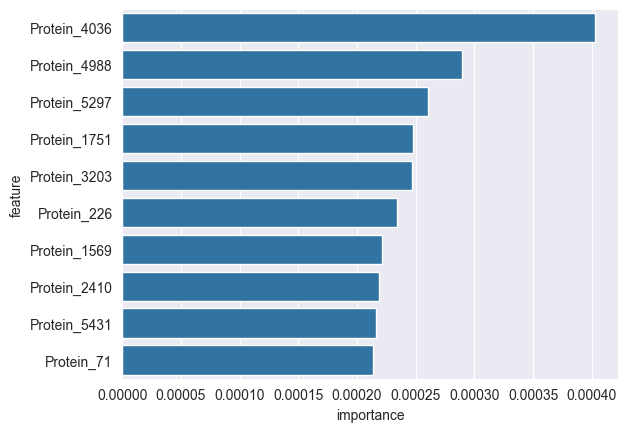

In [33]:
sns.barplot(x="importance", y="feature", data=feature_importances.sort_values("importance", ascending=False).head(10))

In [34]:
from dpks.interpretation import FeatureImportance

importance_calculator = FeatureImportance(
    n_iterations=3,
    feature_names=X.columns.values,
)

importance_calculator.fit(clf, X.values)

/Users/aaron/miniconda3/envs/DPKS-3.12/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/Users/aaron/miniconda3/envs/DPKS-3.12/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/Users/aaron/miniconda3/envs/DPKS-3.12/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/Users/aaron/miniconda3/envs/DPKS-3.12/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/Users/aaron/miniconda3/envs/DPKS-3.12/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression wa

In [38]:
pca = UMAP(n_components=2, n_neighbors=5)

components = pca.fit_transform(importance_calculator.local_explanations.T)

In [39]:
components = np.concatenate((y.reshape((-1, 1)), components), axis=1)

<Axes: xlabel='PC1', ylabel='PC2'>

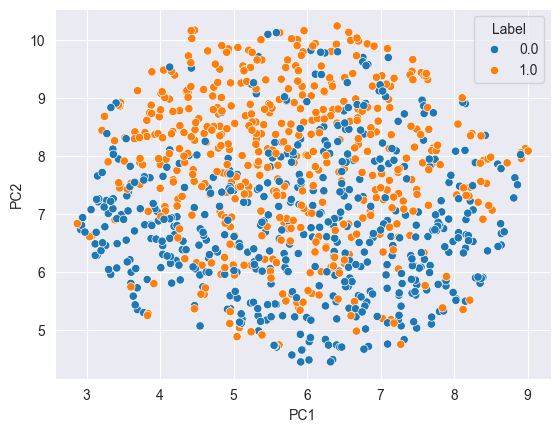

In [41]:
components = pd.DataFrame(components, columns=['Label', 'PC1', 'PC2'])

sns.scatterplot(
    data=components,
    x='PC1',
    y='PC2',
    hue='Label',
)

In [42]:
feature_importances['loss_importance'] = importance_calculator.global_explanations

<Axes: xlabel='loss_importance', ylabel='feature'>

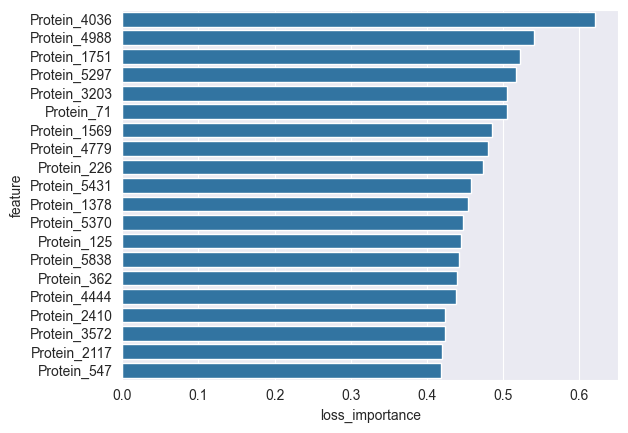

In [43]:
sns.barplot(
    data=feature_importances.sort_values("loss_importance", ascending=False).head(20),
    x="loss_importance",
    y="feature"
)

In [44]:
import shap

In [45]:
explainer = shap.LinearExplainer(clf, X)
#explainer = shap.TreeExplainer(clf)
#explainer = shap.Explainer(clf)
shap_values = explainer(X)

In [46]:
feature_importances['shap_importance'] = np.mean(abs(shap_values.values), axis=0)

In [47]:
feature_importances.sort_values("shap_importance", ascending=False)

feature    importance  loss_importance  shap_importance
4035  Protein_4036  4.024995e-04         0.620318         0.535637
4987  Protein_4988  2.892284e-04         0.540835         0.470561
1750  Protein_1751  2.475606e-04         0.521840         0.453820
5296  Protein_5297  2.601955e-04         0.517244         0.438977
70      Protein_71  2.134453e-04         0.505616         0.437283
...            ...           ...              ...              ...
2992  Protein_2993 -5.372590e-11         0.000005         0.000004
1149  Protein_1150  1.496225e-10         0.000003         0.000003
4207  Protein_4208 -9.851005e-11         0.000002         0.000002
693    Protein_694 -7.843095e-11         0.000001         0.000001
3923  Protein_3924 -4.625729e-11         0.000001         0.000001

[6000 rows x 4 columns]

<Axes: xlabel='shap_importance', ylabel='feature'>

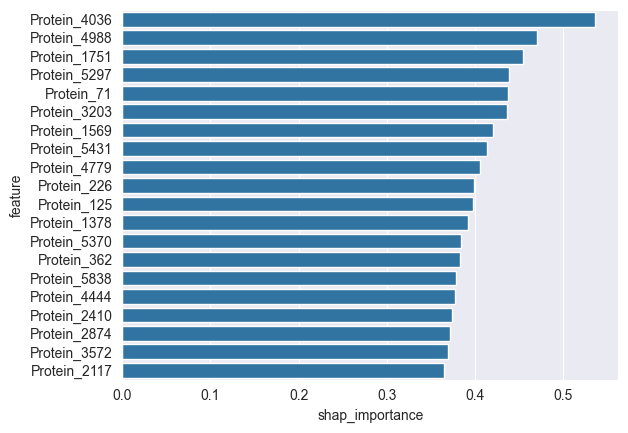

In [48]:
sns.barplot(
    data=feature_importances.sort_values("shap_importance", ascending=False).head(20),
    x="shap_importance",
    y="feature"
)

<Axes: xlabel='shap_importance', ylabel='loss_importance'>

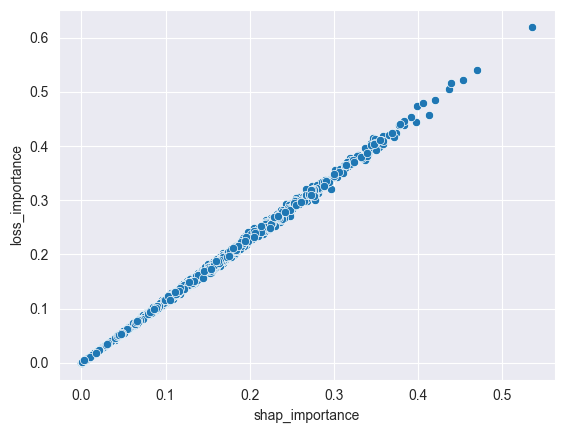

In [49]:
sns.scatterplot(
    data=feature_importances,
    x="shap_importance",
    y="loss_importance",
)

<Axes: xlabel='importance', ylabel='loss_importance'>

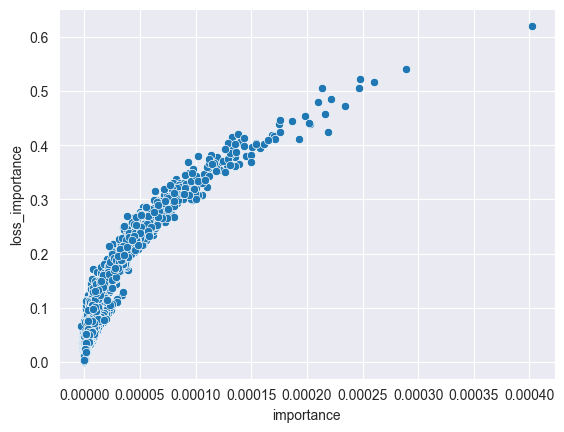

In [50]:
sns.scatterplot(
    data=feature_importances,
    x="importance",
    y="loss_importance",
)

<Axes: xlabel='importance', ylabel='shap_importance'>

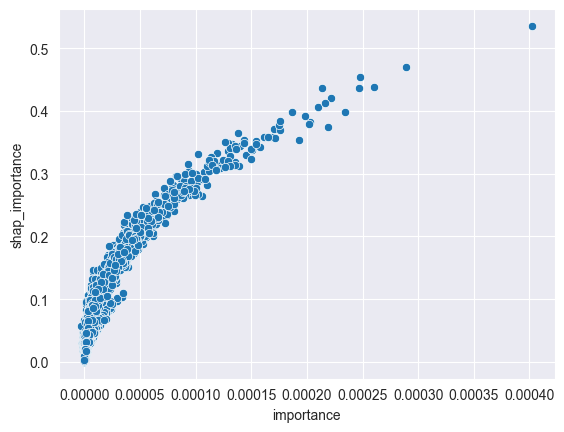

In [51]:
sns.scatterplot(
    data=feature_importances,
    x="importance",
    y="shap_importance",
)